## Analysis of cognitive atlas terms in openneuro metadata

Using data generated by find_cogat_matches.py, saved to ../data/openneuro/cogatlas_matches.json

In [1]:
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
with open('../data/openneuro/cogatlas_matches.json') as f:
    cogatlas_matches = json.load(f)

In [3]:
# get matches for each class of terms

def split_matches_by_type(allmatches):
    match_dict = {}
    for ds, matches in allmatches.items():
        for match in matches:
            matchtype, term = match[1], match[0]
            if matchtype not in match_dict:
                match_dict[matchtype] = defaultdict(lambda: [])
            match_dict[matchtype][ds].append(term)
    return(match_dict)

matches_by_type = split_matches_by_type(cogatlas_matches)

In [4]:
# summarize concept terms

def get_terms_df(term_dict):
    # return long df with terms for each dataset
    allterms = []
    for k, terms in term_dict.items():
        # note: remove repetitions of a term within a dataset
        for term in list(set(terms)):
            allterms.append([k, term])
    
    return(pd.DataFrame(allterms, columns=['ds', 'terms']))

concept_df = get_terms_df(matches_by_type['concept'])
concept_df.head()

,ds,terms
0,ds000001,decision
1,ds000001,risk
2,ds000002,learning
3,ds000003,judgment
4,ds000005,decision


In [5]:
concept_df.terms.value_counts()

memory                       55
fixation                     49
learning                     39
audition                     37
language                     34
                             ..
rehearsal                     1
analogy                       1
strategy                      1
instrumental conditioning     1
incidental learning           1
Name: terms, Length: 225, dtype: int64

## word cloud for concepts

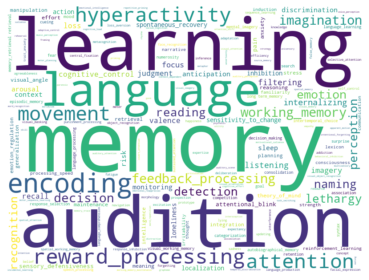

In [6]:

# drop these terms because they are generally not being used as cognitive concepts in this context
stopterms = ['fixation', 'activation']
concept_text = ' '.join([i.replace(' ', '_') for i in concept_df.terms if i not in stopterms])

wc = WordCloud(background_color="white",
               repeat=False, relative_scaling=.5,
              width=800, height=600)
wc.generate(concept_text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout()
plt.savefig('../figures/wordcloud_concept.png')

plt.show()

## word cloud for tasks

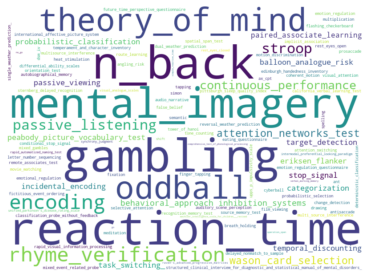

In [11]:
task_df = get_terms_df(matches_by_type['task'])

stopterms = ['criteria task']
def cleanup_text(t):
    bespoke_replacements = {' ': '_',
                            '-': '_',
                            '_task': '',
                            '_fmri_paradigm': ''}
    for orig, repl in bespoke_replacements.items():
        t = t.replace(orig, repl)
    return(t)

task_text = ' '.join([cleanup_text(i) for i in task_df.terms if i not in stopterms])

wc = WordCloud(background_color="white",
               repeat=False, relative_scaling=0,
              width=800, height=600)
wc.generate(task_text)


plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout()
plt.savefig('../figures/wordcloud_task.png')

plt.show()

## word cloud for disorders

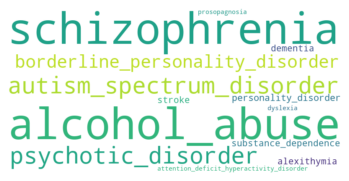

In [8]:
disorder_df = get_terms_df(matches_by_type['disorder'])

stopterms = []
disorder_text = ' '.join([i.replace(' ', '_').replace('-', '_') for i in disorder_df.terms if i not in stopterms])

wc = WordCloud(background_color="white",
               repeat=False, relative_scaling=0,
              width=800, height=400)
wc.generate(disorder_text)

plt.savefig('../figures/wordcloud_disorder.png')

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()